### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
from collections import deque

### **1. Input Data**


$\ f(x) = 2x + 3$


$\ Domain :  -20 \leq x \leq 20$


해당 그래프를 파란색 선으로 그린다.


Gaussian Normal Distribution : mu=0, sigma=1 인 y점들을 random하게 샘플링한다
\
target_y : Linear Model
\
y : Random Point

In [0]:
def input():
  x = np.linspace(-20,20,41)
  #print(x)
  target_y = copy.deepcopy(x)
  for i in range(0, 41):
    target_y[i] = 2 * target_y[i] + 3
  #print(y)

  y = copy.deepcopy(target_y)
  #print(y)
  n = np.random.normal(0,1,41)
  #print(n)
  y = np.add(y,n)
  #print(y)

  fig = plt.figure()

  graph1 = plt.plot(x, target_y, 'b')
  plt.xlabel('x')
  plt.ylabel('target_y')

  graph2 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return x, y

### **2. Linear Regression Model**
#####h(x) = mx + b
#####Objective Function
#####cost = 1/2m * SUM((h(x)-y)^2)

In [0]:
def ObjectiveFunction(m, b):
  #print(m)
  cost = 0
  for x in range(-20, 21):
    h = m * x + b
    #print("m의 값",m)
    r = y[x+20]
    cost += np.square(h - r) / (2*m)
    #print(cost)
  return cost

In [0]:
def gradientDescent(m, b):
  for x in range(-20, 21):
    h = m * x + b
    r = y[x+20]
    lr = 0.0000001
    b -= lr * np.square(h-r) / m
    m -= lr * x * np.square(h-r) / m
  return b, m 

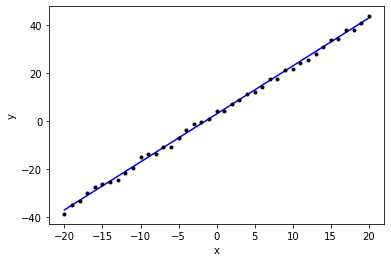

m, b 1.996472379450919 5.047950006275497


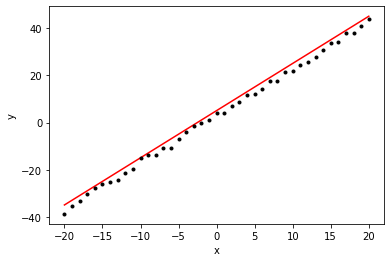

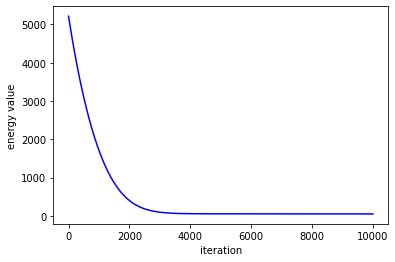

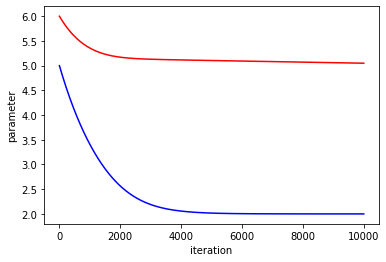

In [0]:
def main():
  x, y = input()
  #print("x", x)
  #print("y", y)
  m = 5
  b = 6   ##initialization
  costs = deque()
  bs = deque()
  ms = deque()
  iters = deque()

  for iter in range(0, 10000):
    value_Object = ObjectiveFunction(m, b)
    b, m = gradientDescent(m, b)
    #print("cost", value_Object)
    #print("절편b",b)
    #print("기울기m",m)
    iters.append(iter)
    costs.append(value_Object)
    bs.append(b)
    ms.append(m)

  #print("iters, costs, ms, bs",iters, costs, ms, bs)
  print("m, b",m,b)

  fig = plt.figure()

  graph3 = plt.plot(x, m * x + b, 'r')
  plt.xlabel('x')
  plt.ylabel('linear regression')

  graph4 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  plt.plot(iters, costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('energy value')
  plt.show()

  fig = plt.figure()

  graph5 = plt.plot(iters, bs, 'r')

  graph6 = plt.plot(iters, ms, 'b')
  plt.xlabel('iteration')
  plt.ylabel('parameter')
  plt.show()
    
    #if value_Object == float('inf'):
    #  value_Object = 99999

if __name__ == "__main__":
  main()